<a href="https://colab.research.google.com/github/lelyta30/PCVK_GENAP_2023/blob/main/week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Lelyta Salsabila

Class : 3I

NIM : 1941720026

Absen : 05

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


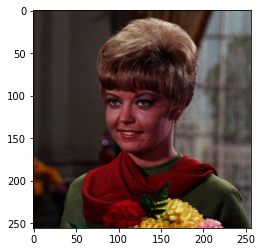

In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

transformation linier brightness

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


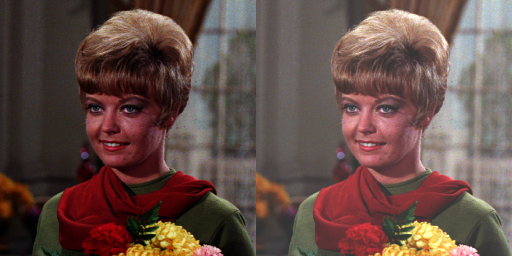

In [ ]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Task 1

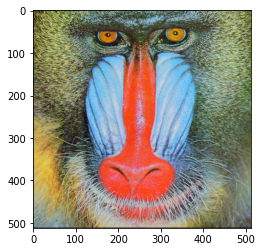

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

Implement Image Invert
----------------------------


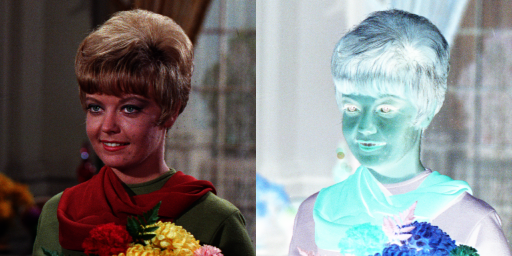

In [3]:
print('Implement Image Invert')
print('----------------------------')


inverted_image = np.zeros(img.shape, img.dtype)

#access each pixel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      inverted_image[y,x,c] = np.clip(255 - img[y, x, c] , 0, 255)

#Simple way without looping

final_frame = cv.hconcat((img, inverted_image))
cv2_imshow(final_frame)

Task 2

Enter contrast value [-255 - 255]: 40


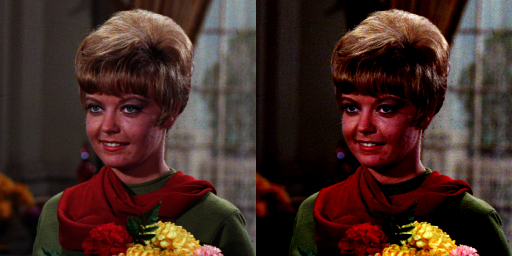

In [4]:
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
transform_img = np.zeros(original.shape, original.dtype)
try:
  contrast = float(input('Enter contrast value [-255 - 255]: '))
except ValueError as e:
  print('Error', e)
factor = (259 * (contrast  + 255)) / (255 * (259 - contrast))
# Constrast Transformation 
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      transform_img[y, x, c] =  np.clip((factor * (original[y, x, c] - 128) + 128) ,0, 255)

transform = cv.hconcat((original,  transform_img))
cv2_imshow(transform)

Task 3

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 60


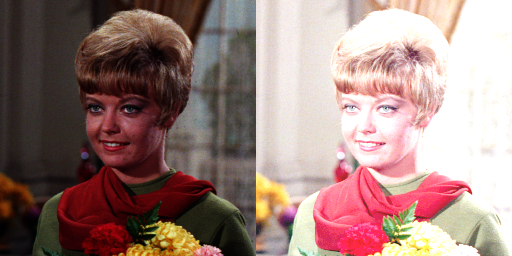

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Task 4A Averaging

In [2]:
luminance_img - np.zeros(img_rgb.shape, img_rgb.dtype)
for y in range (img_rgb.shape[0]);
  for x in range (img_rgb.shape[1]);
    for c in range (img_rgb.shape[2]);
      luminance_img[y,x,c] = 0.21*img_rgb[y,x, 0] + 0.72*img_rgb[y,x, 1] + 0.07*img_rgb[y,x, 2]
    final_frame = cv.hconcat((img_rgb, luminance_image))
    plt.imshow(final_frame)

SyntaxError: ignored

Task 4B Lightness

In [4]:
lightness_img - np.zeros(img_rgb.shape, img_rgb.dtype)
for y in range (img_rgb.shape[0]);
  for x in range (img_rgb.shape[1]);
    for c in range (img_rgb.shape[2]);
      luminance_img[y,x,c] = np.max(img_rgb [y, x, : ])/2 + np.min(img_rgb)[y, x, : ])/2
    final_frame = cv.hconcat((img_rgb, lightness_img))
    plt.imshow(final_frame)

SyntaxError: ignored

Task 4C Luminance

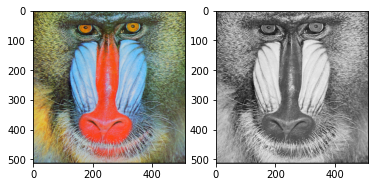

In [ ]:
image_lum = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

Task 5

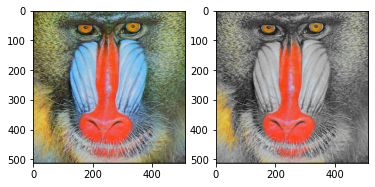

In [ ]:
img_4 = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')
